<font size=5>Coordinate Reference Systems —— 坐标参考系</font>

CRS 定义了如何将地球上的三维地理坐标（经度、纬度、高度）转换为地图上的二维平面坐标

WGS84（EPSG:4326）是一个常用的地理坐标系，使用经纬度来表示位置

In [1]:
import pandas as pd
import geopandas as gpd
from geodatasets import get_path
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Setting the CRS

In [2]:
birds_df = pd.read_csv("archive/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


```bash
gpd.points_from_xy(Longitude,Latitude)
```
​这个函数将经度（Longitude）和纬度（Latitude）列转换为一组 shapely.geometry.Point 对象，表示地理坐标中的点

In [3]:
# 将 DataFrame 转换为 GeoDataFrame
birds = gpd.GeoDataFrame(data=birds_df, geometry=gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))

# 设置坐标参考系（CRS）
# birds.crs = {'init': 'epsg:4326'}   # 此写法已启用，会被警告
birds.set_crs('epsg:4326', inplace=True, allow_override=True)

birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.2435 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.7239)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


In [4]:
# 导入世界地图
world_filepath = get_path('naturalearth.land')
world = gpd.read_file(world_filepath)
world.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


<Axes: >

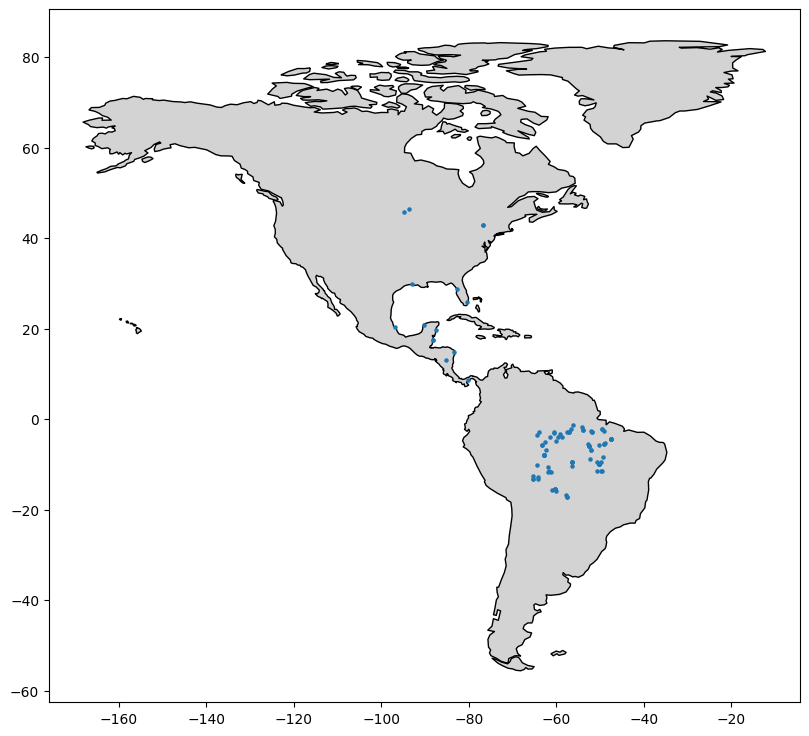

In [5]:
# 获取美洲地图 —— 使用经纬度范围
americas = world.cx[-168:-30, -60:83]
fig, ax = plt.subplots(figsize=(12, 9))
americas.plot(ax=ax, color="lightgray", edgecolor="black")
# 鸟类迁移途径点
birds.plot(ax=ax, markersize=5)

```bash
LineString()
```
定义一个线段

LineString 对象代表由一系列点（按顺序排列）连接成的一条线。它在空间上是一个有方向的几何对象，可以用于表示轨迹、道路、河流等。

In [6]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
# path_gdf.crs = {'init' :'epsg:4326'}
path_gdf.set_crs('epsg:4326', inplace=True)


# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
# start_gdf.crs = {'init' :'epsg:4326'}
start_gdf.set_crs('epsg:4326', inplace=True)


# GeoDataFrame showing ending point for each bird
end_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(data=end_df, geometry=end_df.geometry)
# end_gdf.crs = {'init' :'epsg:4326'}
end_gdf.set_crs('epsg:4326', inplace=True)


,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.0384)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.1923 -5.70504)
4,30275,POINT (-57.70404 -16.72336)
5,30300,POINT (-50.22547 -9.8445)
6,30304,POINT (-52.55503 -5.85648)
7,30380,POINT (-63.98744 -2.9325)
8,30384,POINT (-51.85126 -2.9057)
9,30445,POINT (-53.97454 -2.35599)


<Axes: >

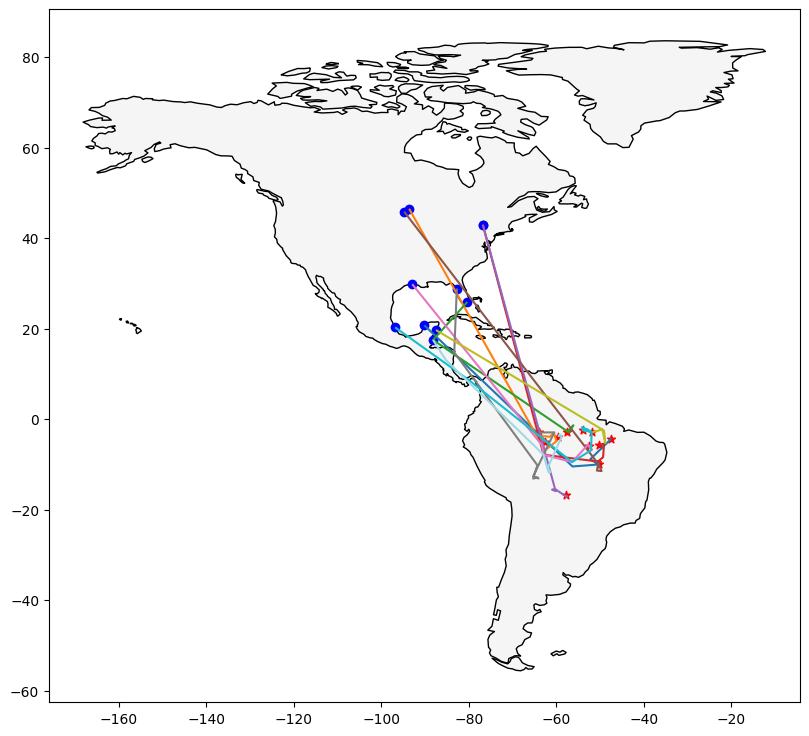

In [7]:
# 迁移路线图
fig, ax = plt.subplots(figsize=(12, 9))
americas.plot(ax=ax, color="whitesmoke", edgecolor="black")
start_gdf.plot(ax=ax, color='blue', marker='o')
end_gdf.plot(ax=ax, color='red', marker='*')
path_gdf.plot(ax=ax, cmap='tab20', marker='-')

In [8]:
# 南美洲自然保护区
protected_filepath = 'archive/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp'
protected_areas = gpd.read_file(protected_filepath)

In [9]:
# 提取南美洲的经纬度范围（大致范围）
south_america = world.cx[-85:-30, -60:15]  # 经度：-85到-30，纬度：-60到15

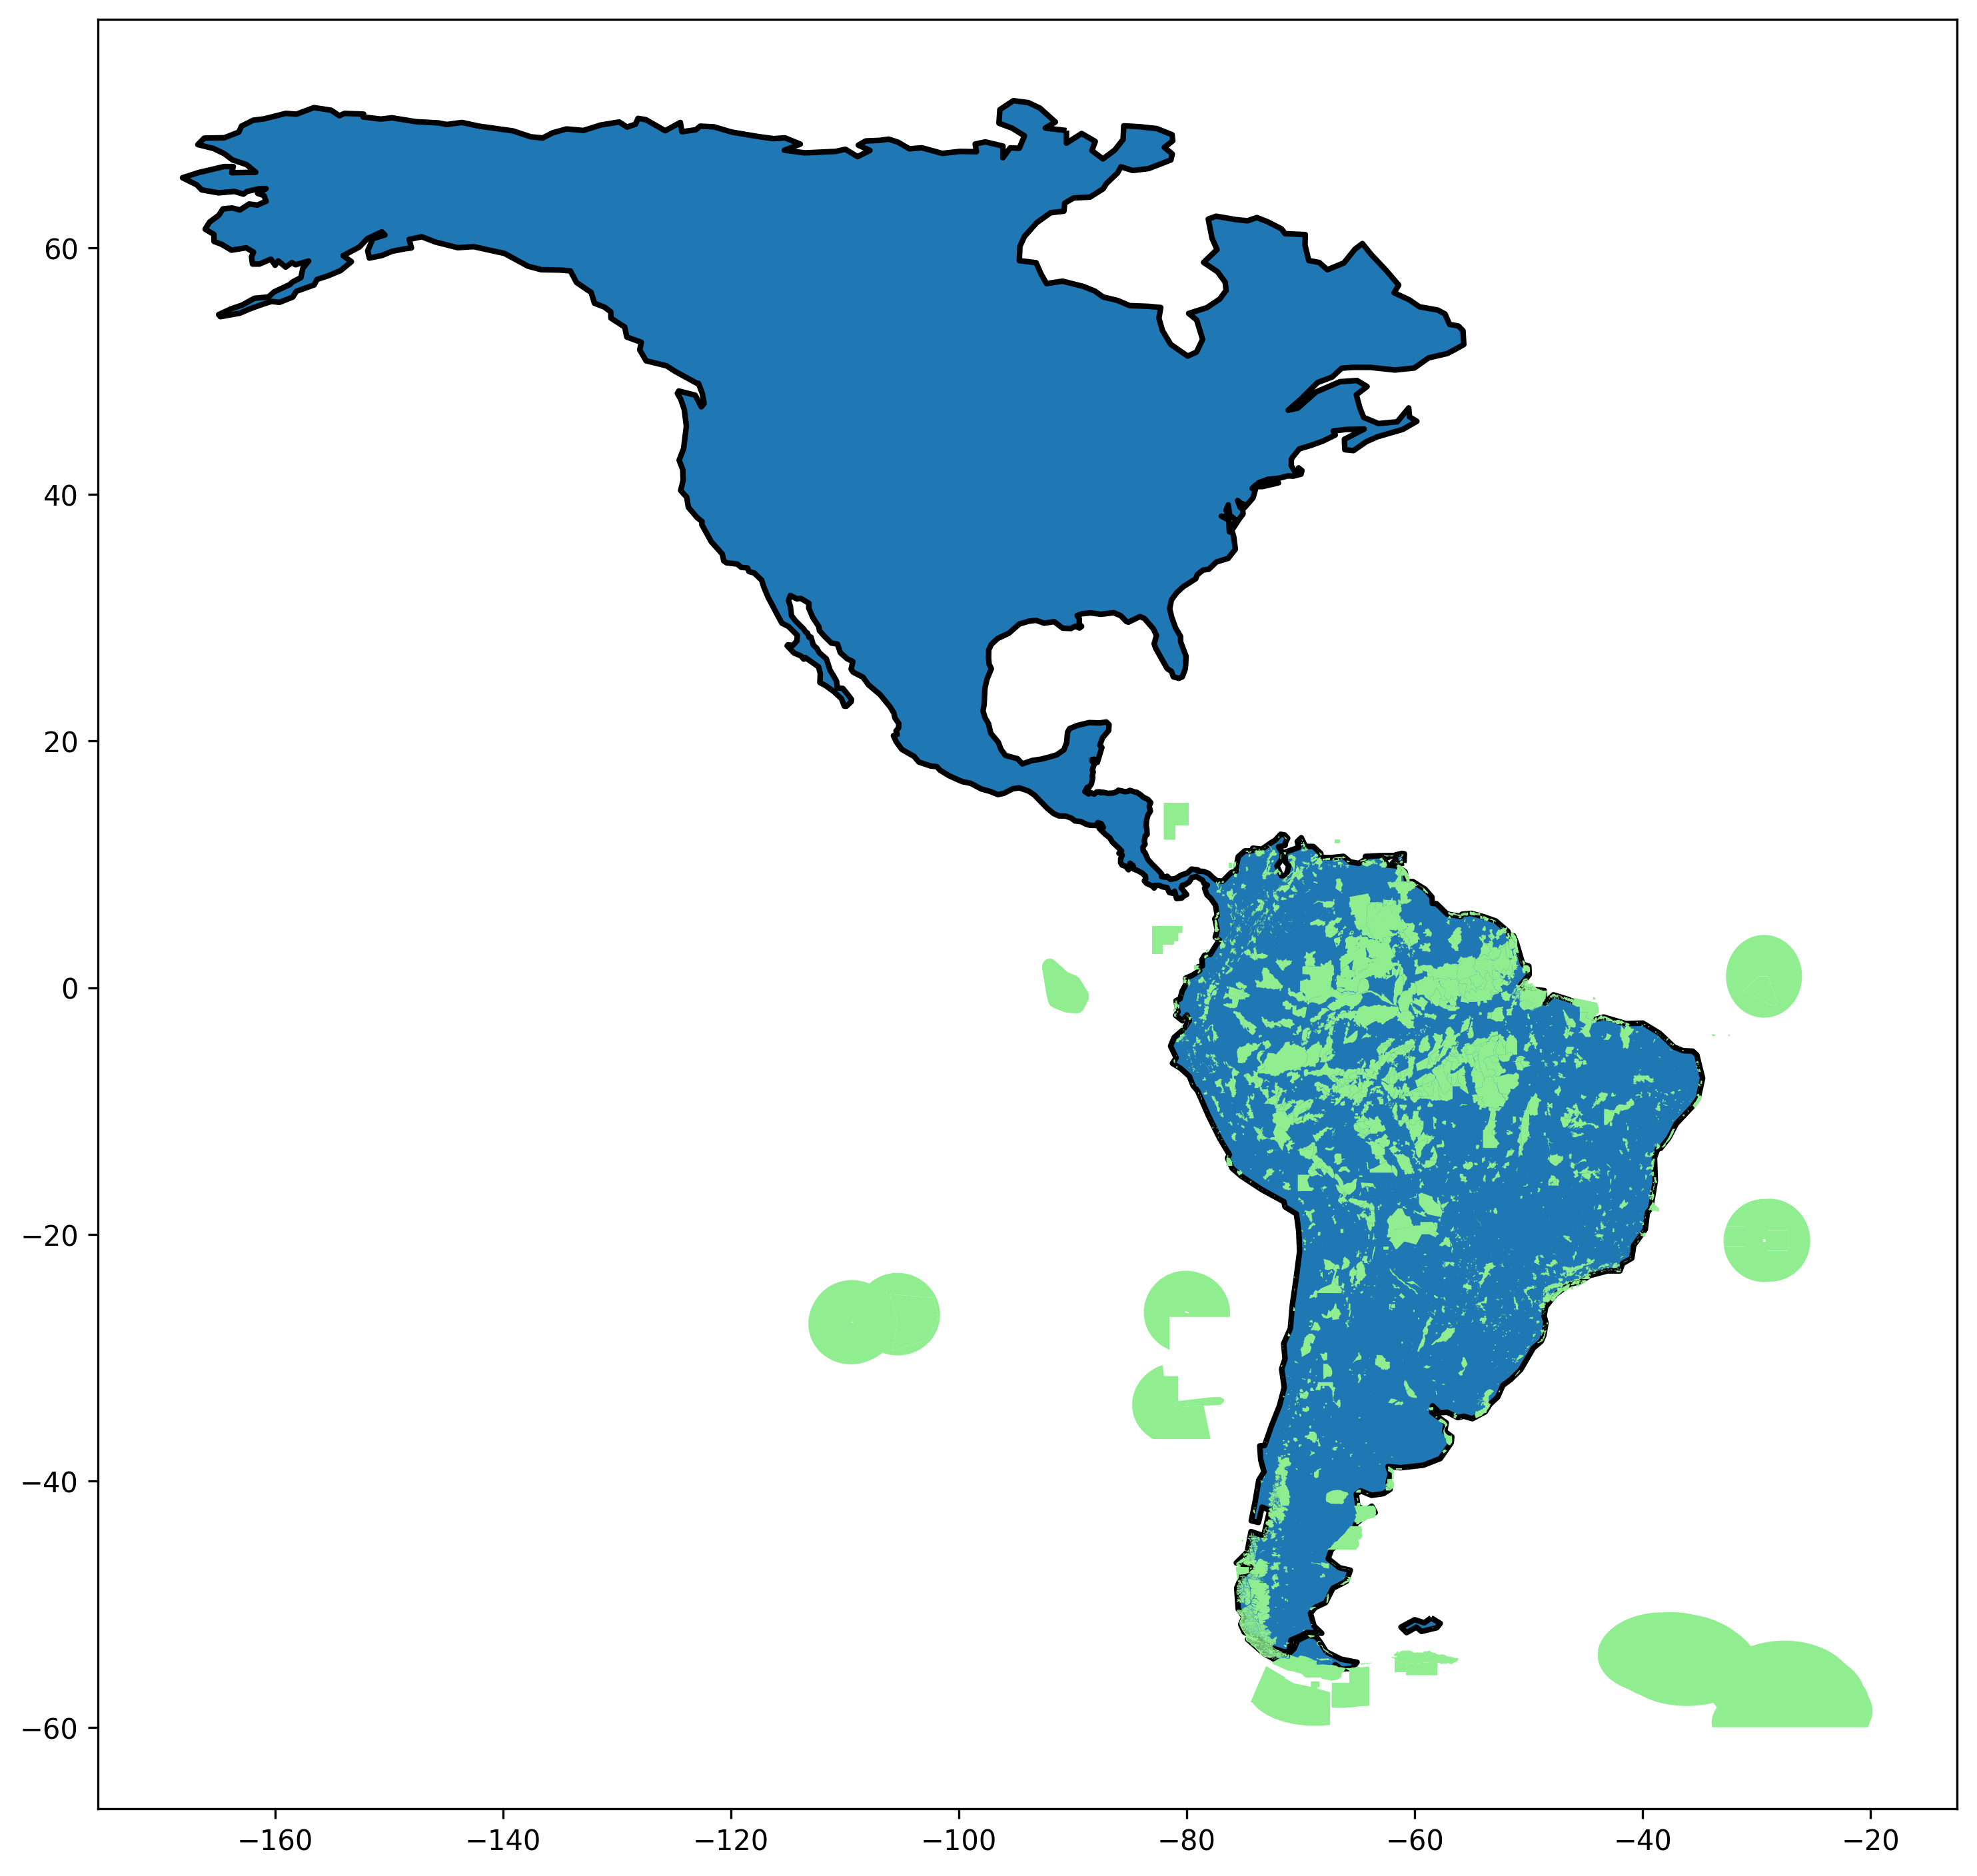

In [10]:
fig, ax = plt.subplots(figsize=(12,12), dpi=300)
south_america.plot(ax=ax, linestyle='-', linewidth=2, edgecolor='black')
protected_areas.plot(ax=ax, color='lightgreen')
plt.show()


# Re-projecting

Re-projecting refers to the process of changing the CRS. This is done in GeoPandas with the to_crs() method.

```bash
(等面积投影)
The equal-area projections (like "Lambert Cylindrical Equal Area", or "Africa Albers Equal Area Conic") preserve area. This is a good choice, if you'd like to calculate the area of a country or city, for example.

(等距投影)
The equidistant projections (like "Azimuthal Equidistant projection") preserve distance. This would be a good choice for calculating flight distance.

In [11]:
# the protected area of South America
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


EPSG:32630 是一个 UTM（Universal Transverse Mercator）坐标系

具体来说是：

- WGS 84 / UTM zone 30N

- 适用于经度在 -6° 到 -12° 之间，主要覆盖西非部分地区（如加纳）。

- 它是一个投影坐标系，单位是米，适合做距离、面积等精确计算。

In [12]:
sum(protected_areas.to_crs(epsg=3035).geometry.area) / 10**6

9464324.023491414

# Zorder

```bash
zorder 决定图层在绘图时的上下顺序（前后层叠关系）

<Axes: >

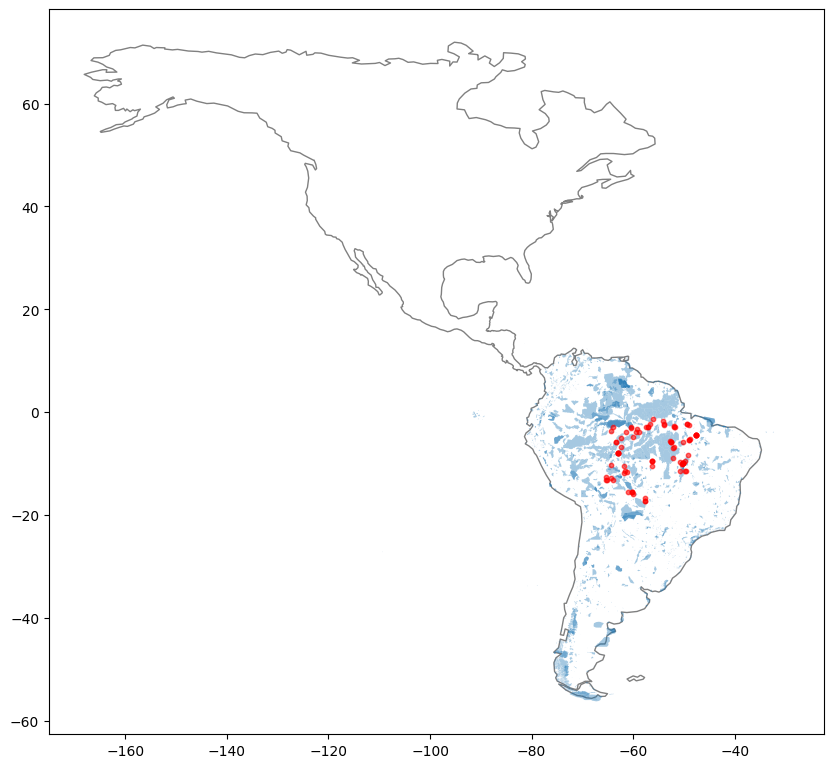

In [13]:
# 第一层：南美洲地图作为背景，默认 zorder=0
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')

# 第二层：绘制受保护区域（zorder=1），在地图之上，稍微透明
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)

# 第三层：绘制鸟类分布点（zorder=2），显示在最上面
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)
